# Data Visulization using Seaborn, plotly and matplotlib
data: Tips dataset from seaborn

Learning:

+


1. Interactive plots in plotly
2. OOP and functoinal approach to data viz
3. push legend out of graphs, customize graph, markers, edge ,line width, line color, marker size
4.for loop for subplots

-

1.violin plot in plotly
2.setting axes labels in scater_matrix() plotly
3. getting trend line/ kde line in graphs for plotly


In [ ]:
from plotly import plotly as p
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [37]:
sns.get_dataset_names()

C:\Users\dnyanadapramod.arjun\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\dnyanadapramod.arjun\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [39]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Text(0.5,1,'Total Bill Spread')

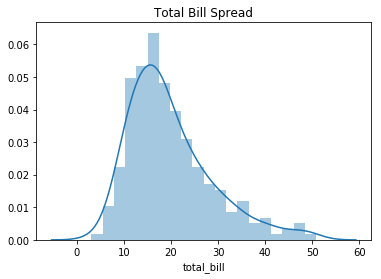

In [45]:
plt.figure(figsize=(6,4))
sns.distplot(df['total_bill'],kde=True,bins=20)
plt.title('Total Bill Spread')


In [54]:
df['total_bill'].iplot(kind='hist',bins=20,colors='orange',title='Total Bill')

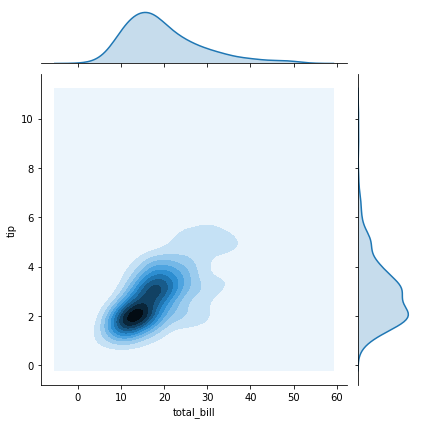

In [30]:
sns.jointplot(df['total_bill'],df['tip'],data=df,kind='kde')

In [57]:
# observe upward trend: as Total Bill increases Tip increases
df.iplot(kind='scatter',x='total_bill',y='tip',mode='markers',size=10,xTitle='Total Bill',yTitle='Tip')

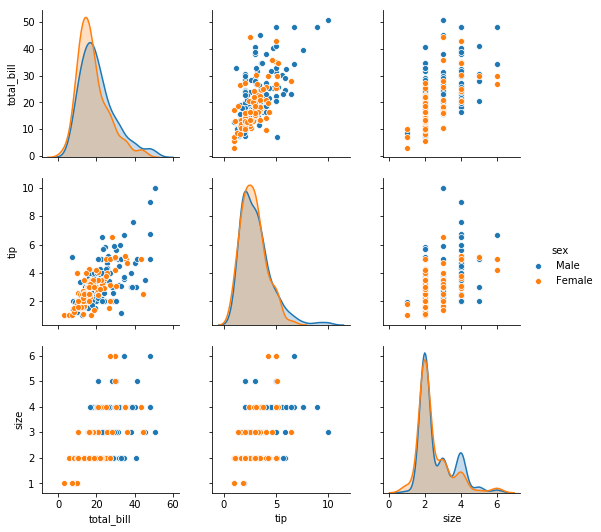

In [32]:
sns.pairplot(data=df,hue='sex')

In [64]:
# plotly doesn't recognise numerical columns from a given df. so drop categorical and keep numerical
df.drop(['sex','smoker','day','time'],axis=1).scatter_matrix()

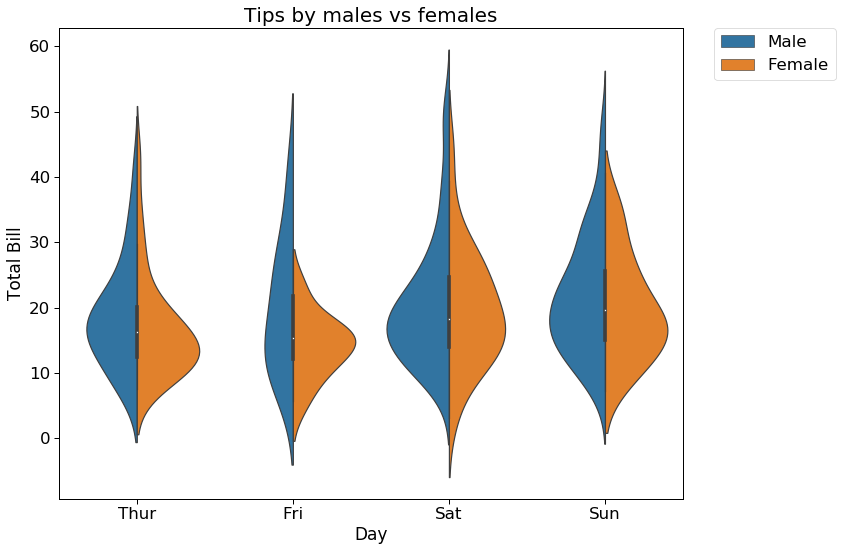

In [99]:
sns.set_context("paper", font_scale=1.9)  
plt.figure(figsize=(10,8))
sns.violinplot(x=df['day'],y=df['total_bill'],hue=df['sex'],split=True)

plt.title('Tips by males vs females',fontsize=20)
plt.xlabel('Day',fontsize=17)
plt.ylabel('Total Bill',fontsize=17)
plt.tight_layout() 
# push legend out
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\dnyanadapramod.arjun\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning:

The `split` parameter has been renamed to `dodge`.



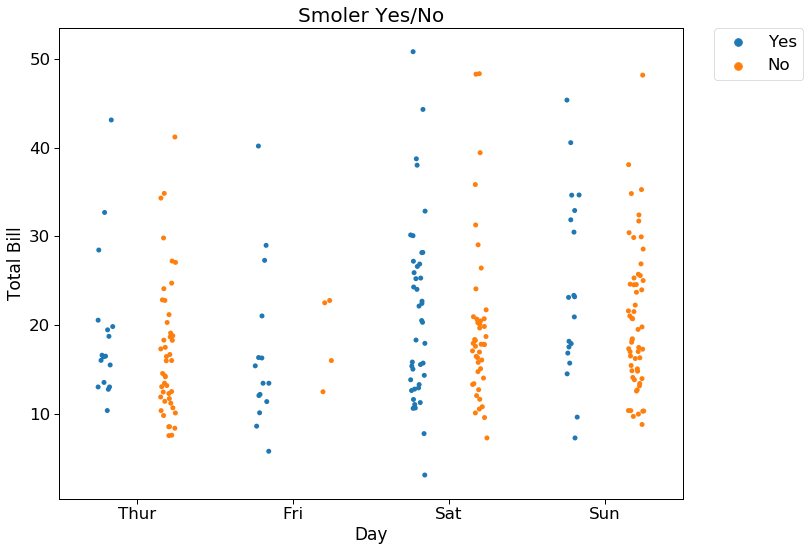

In [109]:
sns.set_context("paper", font_scale=1.9)  
plt.figure(figsize=(10,8))
sns.stripplot(x=df['day'],y=df['total_bill'],hue=df['smoker'],split=True,jitter=True)

plt.title('Smoler Yes/No',fontsize=20)
plt.xlabel('Day',fontsize=17)
plt.ylabel('Total Bill',fontsize=17)
plt.tight_layout() 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Males tip more than women?
following graph shows that Males have been more generous with tips
Maximum tips were received on Saturday

C:\Users\dnyanadapramod.arjun\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning:

The `split` parameter has been renamed to `dodge`.



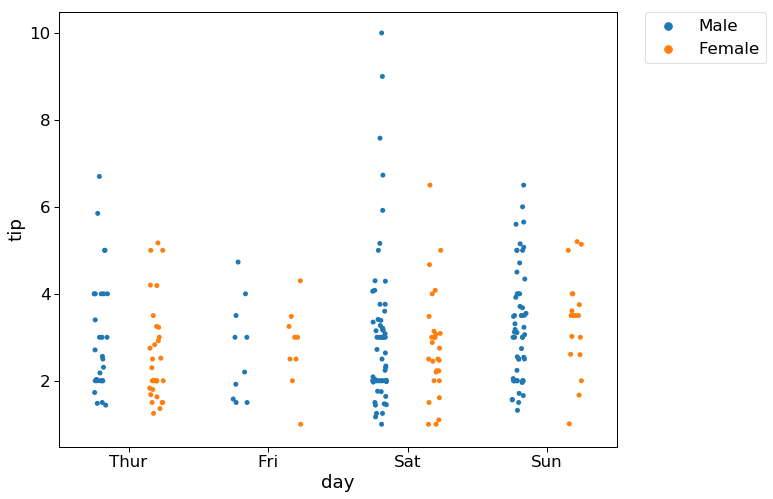

In [118]:
plt.figure(figsize=(10,8))
sns.stripplot(x=df['day'],y=df['tip'],hue=df['sex'],split=True,jitter=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# additional resource on Viz

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x=np.linspace(1,20,15)
y=x**2
z=np.linspace(1,10,15)

#Functional approach
plt.figure(figsize=(14,10))
plt.plot(x,y,'g', label='line 1', linewidth=2)
plt.plot(x,z,'b')
plt.title('tit')
plt.xlabel('cx')

# OOP approach
fig=plt.figure(figsize=(8,6))
axes=fig.add_axes([0.1,0.1,0.8,0.8]) #[(left, bottom, width, height)]
axes.plot(x,y,'purple',linewidth=3,linestyle='--',marker='o',markersize=20,markeredgewidth=5,markeredgecolor='yellow')
axes.set_ylim(0,300)
plt.show()

# for loop for subplots
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(10,8))
axes=axes.flatten()
for c in axes:
    c.plot(x,y)
